In [2]:
import sys
sys.path.append("..")
import torch
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [4,1]
torch.manual_seed(0)

from engression import engression
from src.simulator import binary_simulator, thresholder

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Simulate binary data

In [4]:
x, y = binary_simulator("cubic", n=10000, x_lower=0, x_upper=1, noise_std=0.05, train=True, device=device)
x_eval, y_eval_med, y_eval_mean = binary_simulator("cubic", n=1000, x_lower=0, x_upper=1, noise_std=0.05, train=False, device=device)


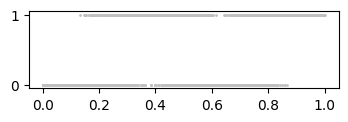

In [ ]:
# Data visualization
plt.scatter(x.cpu(), y.cpu(), label="training data", s=1, color="silver")

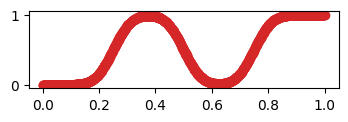

In [ ]:
# True probability
plt.scatter(x_eval.cpu(), y_eval_mean.cpu(), label="true mean", color="C3")

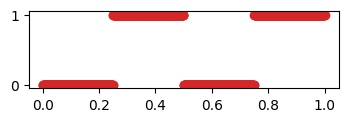

In [ ]:
# Expected outcome after thresholding
plt.scatter(x_eval.cpu(), y_eval_med.cpu(), label="true median", color="C3")

# Binary Engression

In [9]:

# Fit an engression model
engressor = engression(x, y, lr=0.005, num_epochs=500, batch_size=1000, device=device)

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.6191,  E(|Y-Yhat|): 1.1491,  E(|Yhat-Yhat'|): 1.0600
[Epoch 100 (20%), batch 9] energy-loss: 0.4746,  E(|Y-Yhat|): 0.9482,  E(|Yhat-Yhat'|): 0.9473
[Epoch 200 (40%), batch 9] energy-loss: 0.4029,  E(|Y-Yhat|): 0.8393,  E(|Yhat-Yhat'|): 0.8728
[Epoch 300 (60%), batch 9] energy-loss: 0.3469,  E(|Y-Yhat|): 0.7040,  E(|Yhat-Yhat'|): 0.7141
[Epoch 400 (80%), batch 9] energy-loss: 0.3080,  E(|Y-Yhat|): 0.6121,  E(|Yhat-Yhat'|): 0.6082
[Epoch 500 (100%), batch 9] energy-loss: 0.2815,  E(|Y-Yhat|): 0.5792,  E(|Yhat-Yhat'|): 0.5954

Training loss on the original (non-standardized) scale:
	Energy-loss: 0.1367,  E(|Y-Yhat|): 0.2892,  E(|Yhat-Yhat'|): 0.3049

Predictio

In [11]:
# Summarize model information
engressor.summary()

Engression model with
	 number of layers: 2
	 hidden dimensions: 100
	 noise dimensions: 100
	 residual blocks: False
	 number of epochs: 500
	 batch size: 1000
	 learning rate: 0.005
	 standardization: True
	 training mode: False
	 device: cpu

Training loss (original scale):
	 energy-loss: 0.14, 
	E(|Y-Yhat|): 0.29, 
	E(|Yhat-Yhat'|): 0.30


In [12]:
# Evaluation
print("L2 loss:", engressor.eval_loss(x_eval, y_eval_mean, loss_type="l2"))
print("correlation between predicted and true means:", engressor.eval_loss(x_eval, y_eval_mean, loss_type="cor"))


L2 loss: 0.009396946057677269
correlation between predicted and true means: 0.9708878397941589


In [13]:
# Predictions
y_pred = engressor.predict(x_eval, target="mean", sample_size=1000)

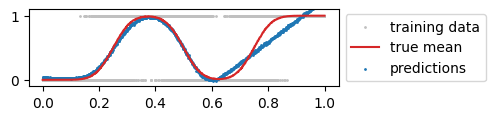

In [14]:

plt.scatter(x.cpu(), y.cpu(), label="training data", s=1, color="silver")
plt.plot(x_eval.cpu(), y_eval_mean.cpu(), label="true mean", color="C3")
plt.scatter(x_eval.cpu(), y_pred.cpu(), label="predictions", s=1)
plt.ylim(-0.1, 1.1)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5)); plt.show()

## Prediction via sampling

In [15]:
y_sample = engressor.sample(x_eval, sample_size=1000)

In [ ]:
# Predict probability via sampling
y_prob = (y_sample > 0.5).float().mean(dim=2).squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0010, 0.0000, 0.0010,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0010, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0010,
        0.0000, 0.0010, 0.0000, 0.0000, 0.0000, 0.0010, 0.0020, 0.0030, 0.0020,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0020, 0.0020, 0.0000, 0.0010, 0.0000,
        0.0000, 0.0000, 0.0010, 0.0020, 0.0040, 0.0060, 0.0010, 0.0030, 0.0020,
        0.0010, 0.0010, 0.0030, 0.0010, 0.0020, 0.0030, 0.0020, 0.0040, 0.0020,
        0.0010, 0.0040, 0.0030, 0.0000, 

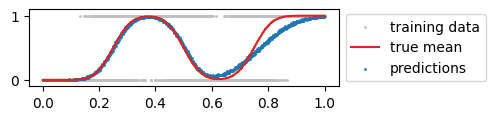

In [24]:

plt.scatter(x.cpu(), y.cpu(), label="training data", s=1, color="silver")
plt.plot(x_eval.cpu(), y_eval_mean.cpu(), label="true mean", color="C3")
plt.scatter(x_eval.cpu(), y_prob.cpu(), label="predictions", s=1)
plt.ylim(-0.1, 1.1)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5)); plt.show()

# Binary Engression using classification mode

In [34]:
# Fit an engression model
engressor = engression(x, y, lr=0.005, num_epochs=500, batch_size=1000, device=device, classification=True)

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.3695,  E(|Y-Yhat|): 0.4883,  E(|Yhat-Yhat'|): 0.2375
[Epoch 100 (20%), batch 9] energy-loss: 0.2034,  E(|Y-Yhat|): 0.4159,  E(|Yhat-Yhat'|): 0.4250
[Epoch 200 (40%), batch 9] energy-loss: 0.2089,  E(|Y-Yhat|): 0.4275,  E(|Yhat-Yhat'|): 0.4373
[Epoch 300 (60%), batch 9] energy-loss: 0.1046,  E(|Y-Yhat|): 0.2281,  E(|Yhat-Yhat'|): 0.2471
[Epoch 400 (80%), batch 9] energy-loss: 0.0887,  E(|Y-Yhat|): 0.1884,  E(|Yhat-Yhat'|): 0.1993
[Epoch 500 (100%), batch 9] energy-loss: 0.0877,  E(|Y-Yhat|): 0.1788,  E(|Yhat-Yhat'|): 0.1821

Training loss on the original (non-standardized) scale:
	Energy-loss: 0.0847,  E(|Y-Yhat|): 0.1760,  E(|Yhat-Yhat'|): 0.1827

Predictio

In [35]:
# Summarize model information
engressor.summary()

Engression model with
	 number of layers: 2
	 hidden dimensions: 100
	 noise dimensions: 100
	 residual blocks: False
	 number of epochs: 500
	 batch size: 1000
	 learning rate: 0.005
	 standardization: True
	 training mode: False
	 device: cpu

Training loss (original scale):
	 energy-loss: 0.08, 
	E(|Y-Yhat|): 0.18, 
	E(|Yhat-Yhat'|): 0.18


In [36]:
# Evaluation
print("L2 loss:", engressor.eval_loss(x_eval, y_eval_mean, loss_type="l2"))
print("correlation between predicted and true means:", engressor.eval_loss(x_eval, y_eval_mean, loss_type="cor"))


L2 loss: 0.0010801423341035843
correlation between predicted and true means: 0.9970585107803345


In [37]:
# Predictions
y_pred = engressor.predict(x_eval, target="mean", sample_size=1000)

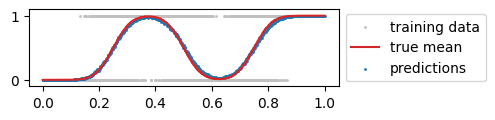

In [38]:

plt.scatter(x.cpu(), y.cpu(), label="training data", s=1, color="silver")
plt.plot(x_eval.cpu(), y_eval_mean.cpu(), label="true mean", color="C3")
plt.scatter(x_eval.cpu(), y_pred.cpu(), label="predictions", s=1)
plt.ylim(-0.1, 1.1)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5)); plt.show()